In [56]:
import statsmodels.api as sm
import json
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings("ignore")

In [11]:
%matplotlib inline

# Yelp ratings
filter businesses that are restaurants

In [14]:
def load_yelp(limit):
    file1 = open('yelp_dataset/yelp_academic_dataset_review.json', 'r')
    count = 0
    users=[]
    restaurants=[]
    ratings=[]
    reviews=[]
    dates=[]
    for line in file1:
        count += 1
        #print(count)
        res = json.loads(line)
        #print(res)
        #break
        users.append(res['user_id'])
        restaurants.append(res['business_id'])
        ratings.append(res['stars'])
        # not using text any more
        reviews.append(res['text'][0:1])
        dates.append(res['date'])
        if count==limit: break
    # Closing files
    file1.close()
    df_yelp = pd.DataFrame(list(zip(users, restaurants,ratings,reviews,dates)),
                   columns =['user', 'item','rating','review','date'])
    print(len(df_yelp))
    all_restaurants=get_restaurants()
    df_test=pd.merge(df_yelp, all_restaurants, on='item', how='outer')
    df_restaurants=df_test.dropna()
    df_yelp=df_restaurants
    return df_yelp


def get_restaurants():    
    file1 = open('yelp_dataset/yelp_academic_dataset_business.json', 'r')
    count = 0
    restaurants=[]
    categories=[]
    names=[]
    for line in file1:
        count += 1
        res = json.loads(line)
        #print(res)
        #print(res['business_id'])
        #print(res['categories'])
        try:
            if 'Restaurants' in res['categories']: 
                restaurants.append(res['business_id'])
                #restaurants.append(res['name'])
                categories.append(res['categories'])
                names.append(res['name'])
        except:
            continue #print('error')
        #if count==50: break
    # Closing files
    file1.close()
    df = pd.DataFrame(list(zip(restaurants,categories,names)),
                   columns =['item','category','name'])
    return df

In [15]:
df_yelp=load_yelp(1000000)


50001


In [16]:
df_yelp.head()

,user,item,rating,review,date,category,name
0,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,I,2018-07-07 22:09:11,"Restaurants, Breakfast & Brunch, Food, Juice B...",Turning Point of North Wales
1,Iaee7y6zdSB3B-kRCo4z1w,XQfwVwDr-v0ZS3_CbbE5Xw,2.0,T,2017-05-13 17:06:55,"Restaurants, Breakfast & Brunch, Food, Juice B...",Turning Point of North Wales
2,ejFxLGqQcWNLdNByJlIhnQ,XQfwVwDr-v0ZS3_CbbE5Xw,4.0,T,2017-08-08 00:58:18,"Restaurants, Breakfast & Brunch, Food, Juice B...",Turning Point of North Wales
3,f7xa0p_1V9lx53iIGN5Sug,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,W,2017-11-19 02:20:23,"Restaurants, Breakfast & Brunch, Food, Juice B...",Turning Point of North Wales
4,dCooFVCk8M1nVaQqcfTL3Q,XQfwVwDr-v0ZS3_CbbE5Xw,2.0,M,2017-09-09 17:49:47,"Restaurants, Breakfast & Brunch, Food, Juice B...",Turning Point of North Wales


In [17]:
len(df_yelp)

36150

In [18]:
df_yelp['rating'].mean()

3.812005532503458

In [19]:
df_yelp['year']=pd.DatetimeIndex(df_yelp['date']).year.tolist()

<Axes: xlabel='year'>

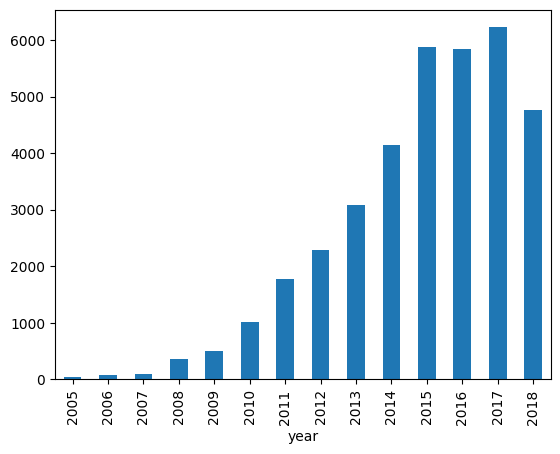

In [20]:
df_yelp.groupby('year').count()['rating'].plot.bar()

In [21]:
all_items=df_yelp.groupby('item').count()

# 52k restaurants in the full dataset

In [23]:
len(all_items)

3664

In [24]:
all_users=df_yelp.groupby('user').count()

# 1.4m users in the full review dataset

In [26]:
len(all_users)

31939

# Yelp users

In [27]:
def load_yelp_users(limit):
    file1 = open('yelp_dataset/yelp_academic_dataset_user.json', 'r')
    count = 0
    users=[]
    review_counts=[]
    avg_ratings=[]
    elite=[]
    for line in file1:
        count += 1
        print(line)
        res = json.loads(line)
        print(res)
        #break
        users.append(res['user_id'])
        review_counts.append(res['review_count'])
        avg_ratings.append(res['average_stars'])
        if count==limit: break
    # Closing files
    file1.close()
    df_yelp_users = pd.DataFrame(list(zip(users, review_counts,avg_ratings)),
                   columns =['user', 'review_count','avg_rating'])
    return df_yelp_users


In [41]:
df_yelp_users=load_yelp_users(100000000)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [42]:
len(df_yelp_users)

500001

In [43]:
df_yelp_users=df_yelp_users.set_index('user')

In [44]:
#df_yelp_users['pikiness']=df_yelp_users['avg_rating']
#df_yelp_users['count']=df_yelp_users['review_count']
df_yelp_users = df_yelp_users.rename(columns={'avg_rating': 'pikiness', 'review_count': 'count'})

In [45]:
df_yelp_users.head()

,count,pikiness
user,,
qVc8ODYU5SZjKXVBgXdI7w,585,3.91
j14WgRoU_-2ZE1aw1dXrJg,4333,3.74
2WnXYQFK0hXEoTxPtV2zvg,665,3.32
SZDeASXq7o05mMNLshsdIA,224,4.27
hA5lMy-EnncsH4JoR-hFGQ,79,3.54


In [46]:
df_yelp_users['pikiness'].mean()

3.7377498645002714

In [47]:
plt.rcParams['figure.figsize'] = [7, 5]

0
1


Text(0, 0.5, 'count')

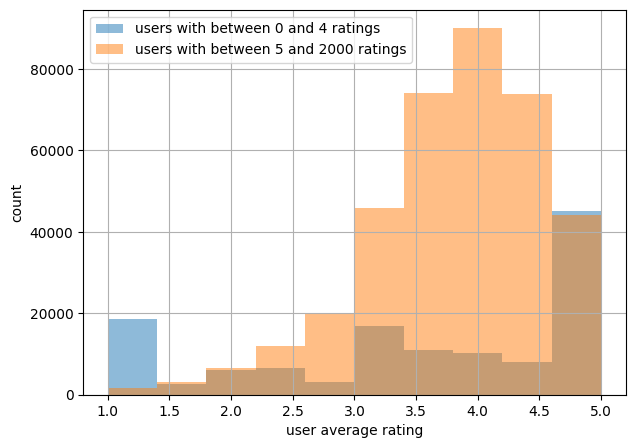

In [48]:
lower_bound=[0,5]
upper_bound=[4,2000]
for i in (0,1):
    print(i)
    
    df_yelp_users[(df_yelp_users['count']>=lower_bound[i]) & (df_yelp_users['count']<=upper_bound[i])]['pikiness'].hist(label='users with between '+str(lower_bound[i])+' and '+str(upper_bound[i])+' ratings',alpha=0.5)
    
plt.legend(loc='upper left')
plt.xlabel('user average rating')
plt.ylabel('count')

In [49]:
lower_bound[i]

5

0
5
10
20


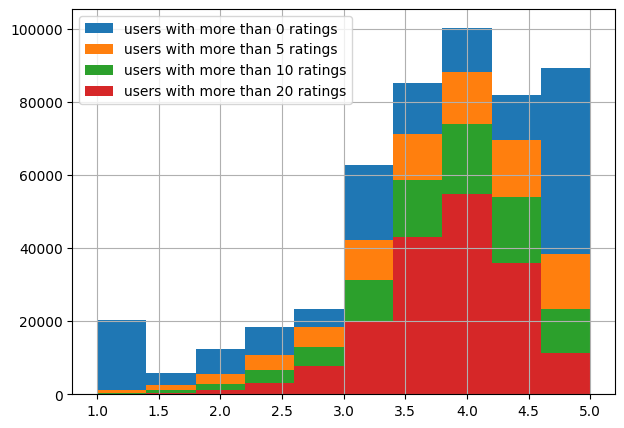

In [50]:
for i in (0,5,10,20):
    print(i)
    df_yelp_users[df_yelp_users['count']>i]['pikiness'].hist(label='users with more than '+str(i)+' ratings')
    
plt.legend(loc='upper left')

In [51]:
df_yelp_users[df_yelp_users['count']>4]['pikiness'].quantile(.25)

3.43

In [52]:
df_yelp_users[df_yelp_users['count']>4]['pikiness'].quantile(.5)

3.9

In [53]:
df_yelp_users[df_yelp_users['count']>4]['pikiness'].quantile(.75)

4.31

# after 5-10 ratings, average pickiness stabilizes

In [57]:
df_yelp_users['log_count']=np.round(np.log10(df_yelp_users['count']),1)

<Axes: xlabel='count'>

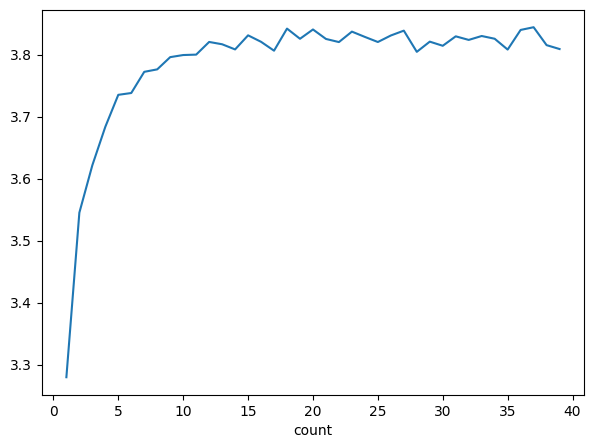

In [58]:
df_yelp_users.groupby('count').mean()['pikiness'][1:40].plot()

# Merge ratings with raters

In [59]:
df_with_users = df_yelp.merge(df_yelp_users, 
               how = 'inner',
               left_on = 'user',
               right_on = 'user')

In [60]:
len(df_with_users)

36150

In [61]:
df_with_users.head()

,user,item,rating,review,date,category,name,year,count,pikiness,log_count
0,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,I,2018-07-07 22:09:11,"Restaurants, Breakfast & Brunch, Food, Juice B...",Turning Point of North Wales,2018,33,4.06,1.5
1,mh_-eMZ6K5RLWhZyISBhwA,d_tRshM-w6S4QxE4VVi8tQ,3.0,J,2017-03-05 14:26:14,"American (New), Restaurants, Southern, Diners,...",Jones,2017,33,4.06,1.5
2,Iaee7y6zdSB3B-kRCo4z1w,XQfwVwDr-v0ZS3_CbbE5Xw,2.0,T,2017-05-13 17:06:55,"Restaurants, Breakfast & Brunch, Food, Juice B...",Turning Point of North Wales,2017,9,2.89,1.0
3,ejFxLGqQcWNLdNByJlIhnQ,XQfwVwDr-v0ZS3_CbbE5Xw,4.0,T,2017-08-08 00:58:18,"Restaurants, Breakfast & Brunch, Food, Juice B...",Turning Point of North Wales,2017,156,3.73,2.2
4,f7xa0p_1V9lx53iIGN5Sug,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,W,2017-11-19 02:20:23,"Restaurants, Breakfast & Brunch, Food, Juice B...",Turning Point of North Wales,2017,196,3.69,2.3


# Rater analysis

note: half of the ratings come from users with >27 ratings

In [62]:
def plot_histogram(df,condition,title):
    norm=df[condition].groupby('rating').count()['user'].sum()
    #print(norm)
    (df[condition].groupby('rating').count()['user']/norm).plot.bar()
    #print(df[condition].groupby('rating').count()['user'])
    plt.title(title)
    return norm,df[condition].groupby('rating').count()['user']/norm
    
def greatness_frequency(df_with_users,condition,title):
    pct_great=[]
    for i in range(1,6):
        pct_great.append(df_with_users[(df_with_users['rating']==i) & (condition)]['great'].mean())
    plt.bar([1,2,3,4,5],pct_great)
    plt.title(title)
    
def amazingness_frequency(df_with_users,condition,title):
    pct_great=[]
    for i in range(1,6):
        pct_great.append(df_with_users[(df_with_users['rating']==i) & (condition)]['amazing'].mean())
    plt.bar([1,2,3,4,5],pct_great)
    plt.title(title)
    return np.array(pct_great)

# two kind of raters: inflating and deflating

(6888,
 rating
 1.0    0.215447
 2.0    0.175087
 3.0    0.150407
 4.0    0.216899
 5.0    0.242160
 Name: user, dtype: float64)

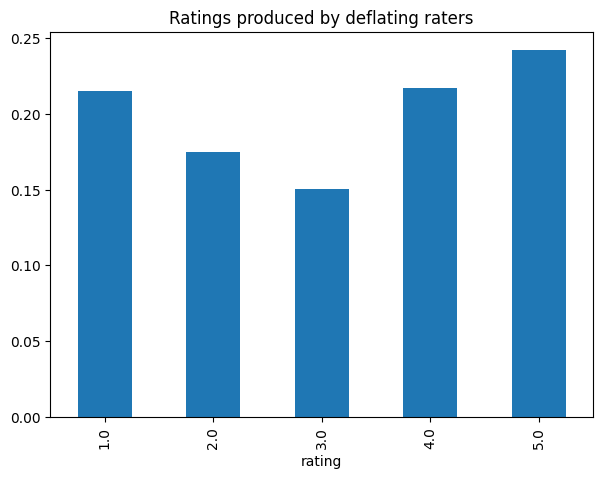

In [63]:
min_num_ratings=4
deflaters=df_yelp_users[df_yelp_users['count']>min_num_ratings]['pikiness'].quantile(.25)

plot_histogram(df_with_users,(df_with_users['pikiness']<deflaters) & (df_with_users['count']>min_num_ratings),'Ratings produced by deflating raters')

In [64]:
deflaters

3.43

(5853,
 rating
 1.0    0.016060
 2.0    0.024090
 3.0    0.046472
 4.0    0.207586
 5.0    0.705792
 Name: user, dtype: float64)

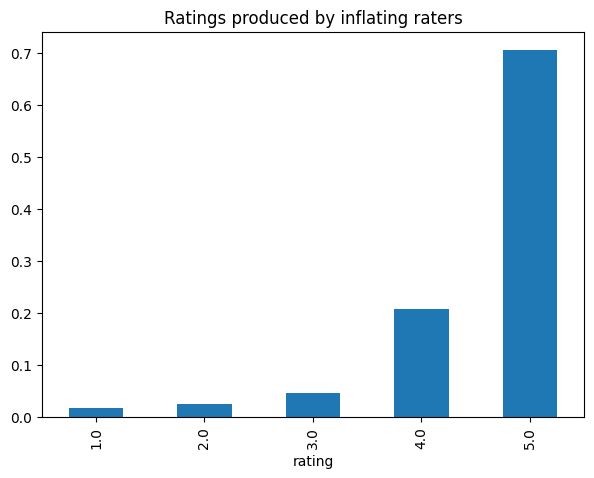

In [65]:
inflaters=df_yelp_users[df_yelp_users['count']>min_num_ratings]['pikiness'].quantile(.75)

plot_histogram(df_with_users,(df_with_users['pikiness']>inflaters) & (df_with_users['count']>min_num_ratings),'Ratings produced by inflating raters')

In [66]:
inflaters

4.31

# restaurant analysis

In [67]:
def load_yelp_businesses(limit):
    file1 = open('yelp_dataset/yelp_academic_dataset_business.json', 'r')
    count = 0
    items=[]
    review_counts=[]
    avg_ratings=[]
    names=[]
    cities=[]
    for line in file1:
        count += 1
        res = json.loads(line)
        try:
            
            if 'Restaurants' in res['categories']: 
                #print(res)
                items.append(res['business_id'])
                cities.append(res['city'])
                #categories.append(res['categories'])
                names.append(res['name'])
                review_counts.append(res['review_count'])
                avg_ratings.append(res['stars'])
        except:
            continue #print('error')
        if count==limit: break
    # Closing files
    file1.close()
    df = pd.DataFrame(list(zip(items,names,review_counts,avg_ratings,cities)),
                   columns =['item','name','item_rating_count','item_rating_avg','city'])
    return df


In [68]:
restaurants=load_yelp_businesses(100000000)

In [69]:
restaurants.head()

,item,name,item_rating_count,item_rating_avg,city
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,80,4.0,Philadelphia
1,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,6,2.0,Ashland City
2,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,19,3.0,Affton
3,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,10,1.5,Nashville
4,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,10,4.0,Tampa Bay


In [70]:
restaurants.iloc[0:15000000].to_json('yelp_dataset/yelp_academic_dataset_business_small.json')

In [71]:
restaurants['item_rating_avg'].mean()

3.5141800958817075

In [72]:
len(restaurants)

17313

0
1
2


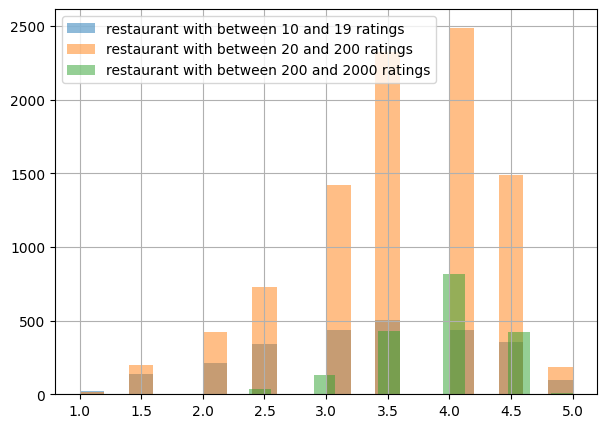

In [73]:
lower_bound=[10,20,200]
upper_bound=[19,200,2000]
for i in (0,1,2):
    print(i)
    
    #df_yelp_users[(df_yelp_users['count']>lower_bound[i]) & (df_yelp_users['count']<upper_bound[i])]['pikiness'].hist(label='users with between '+str(lower_bound[i])+' and '+str(upper_bound[i])+' ratings')
    h=restaurants[(restaurants['item_rating_count']>lower_bound[i]) & (restaurants['item_rating_count']<upper_bound[i])]['item_rating_avg'].hist(bins=20,alpha=0.5,label='restaurant with between '+str(lower_bound[i])+' and '+str(upper_bound[i])+' ratings')

plt.legend(loc='upper left')

0
10
200


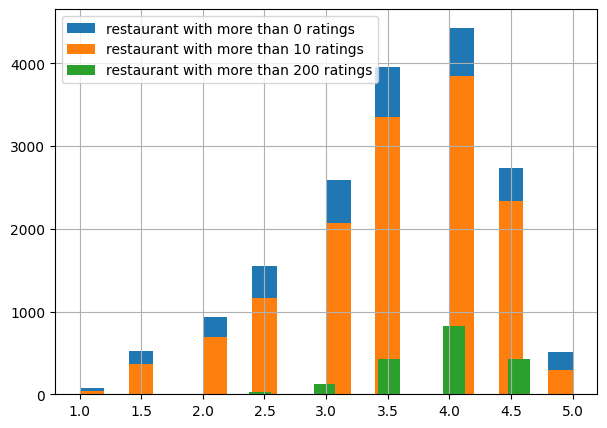

In [74]:
for i in (0,10,200):
    print(i)
    #df_yelp_users[df_yelp_users['count']>i]['pikiness'].hist()
    #restaurants[restaurants['item_rating_count']>i].groupby('item_rating_avg').count()['item'].plot.bar() 
    h=restaurants[restaurants['item_rating_count']>i]['item_rating_avg'].hist(bins=20,label='restaurant with more than '+str(i)+' ratings')

plt.legend(loc='upper left')

In [75]:
restaurants[restaurants['item_rating_count']>100].groupby('city').count()['item'].sort_values(ascending=False).iloc[0:10]

city
Philadelphia     547
Tampa            286
New Orleans      279
Nashville        271
Tucson           237
Indianapolis     214
Reno             172
Saint Louis      162
Santa Barbara    117
Boise             65
Name: item, dtype: int64

# Merge ratings with restaurants

In [76]:
df = df_with_users.merge(restaurants, 
               how = 'inner',
               left_on = 'item',
               right_on = 'item')

In [77]:
len(df)

36150

In [78]:
df.head()

,user,item,rating,review,date,category,name_x,year,count,pikiness,log_count,name_y,item_rating_count,item_rating_avg,city
0,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,I,2018-07-07 22:09:11,"Restaurants, Breakfast & Brunch, Food, Juice B...",Turning Point of North Wales,2018,33,4.06,1.5,Turning Point of North Wales,169,3.0,North Wales
1,Iaee7y6zdSB3B-kRCo4z1w,XQfwVwDr-v0ZS3_CbbE5Xw,2.0,T,2017-05-13 17:06:55,"Restaurants, Breakfast & Brunch, Food, Juice B...",Turning Point of North Wales,2017,9,2.89,1.0,Turning Point of North Wales,169,3.0,North Wales
2,ejFxLGqQcWNLdNByJlIhnQ,XQfwVwDr-v0ZS3_CbbE5Xw,4.0,T,2017-08-08 00:58:18,"Restaurants, Breakfast & Brunch, Food, Juice B...",Turning Point of North Wales,2017,156,3.73,2.2,Turning Point of North Wales,169,3.0,North Wales
3,f7xa0p_1V9lx53iIGN5Sug,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,W,2017-11-19 02:20:23,"Restaurants, Breakfast & Brunch, Food, Juice B...",Turning Point of North Wales,2017,196,3.69,2.3,Turning Point of North Wales,169,3.0,North Wales
4,dCooFVCk8M1nVaQqcfTL3Q,XQfwVwDr-v0ZS3_CbbE5Xw,2.0,M,2017-09-09 17:49:47,"Restaurants, Breakfast & Brunch, Food, Juice B...",Turning Point of North Wales,2017,17,3.22,1.2,Turning Point of North Wales,169,3.0,North Wales


In [79]:
min_num_ratings=4
deflaters_th=df_yelp_users[df_yelp_users['count']>=min_num_ratings]['pikiness'].quantile(.25)
inflaters_th=df_yelp_users[df_yelp_users['count']>=min_num_ratings]['pikiness'].quantile(.75)

In [80]:
inflaters_th

4.32

In [81]:
item_means_by_normal_raters=(2*df[['rating','item']][(df['pikiness']>deflaters_th) & (df['pikiness']<inflaters_th)].groupby('item').mean()['rating']).round()/2

In [82]:
item_means_by_normal_raters=item_means_by_normal_raters.rename('score_by_normal_raters')

In [83]:
item_means_by_normal_raters.head()

item
--ZVrH2X2QXBFdCilbirsw    4.5
-1MhPXk1FglglUAmuPLIGg    3.0
-2ke_JDOpgTZWqirMFjZcw    2.5
-3AooxIkg38UyUdlz5oXdw    3.5
-49YlJ2GGzgmQ71FX9gGyg    4.0
Name: score_by_normal_raters, dtype: float64

In [84]:
df = df.merge(item_means_by_normal_raters, 
               how = 'inner',
               left_on = 'item',
               right_on = 'item')

In [85]:
df.head()

,user,item,rating,review,date,category,name_x,year,count,pikiness,log_count,name_y,item_rating_count,item_rating_avg,city,score_by_normal_raters
0,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,I,2018-07-07 22:09:11,"Restaurants, Breakfast & Brunch, Food, Juice B...",Turning Point of North Wales,2018,33,4.06,1.5,Turning Point of North Wales,169,3.0,North Wales,3.0
1,Iaee7y6zdSB3B-kRCo4z1w,XQfwVwDr-v0ZS3_CbbE5Xw,2.0,T,2017-05-13 17:06:55,"Restaurants, Breakfast & Brunch, Food, Juice B...",Turning Point of North Wales,2017,9,2.89,1.0,Turning Point of North Wales,169,3.0,North Wales,3.0
2,ejFxLGqQcWNLdNByJlIhnQ,XQfwVwDr-v0ZS3_CbbE5Xw,4.0,T,2017-08-08 00:58:18,"Restaurants, Breakfast & Brunch, Food, Juice B...",Turning Point of North Wales,2017,156,3.73,2.2,Turning Point of North Wales,169,3.0,North Wales,3.0
3,f7xa0p_1V9lx53iIGN5Sug,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,W,2017-11-19 02:20:23,"Restaurants, Breakfast & Brunch, Food, Juice B...",Turning Point of North Wales,2017,196,3.69,2.3,Turning Point of North Wales,169,3.0,North Wales,3.0
4,dCooFVCk8M1nVaQqcfTL3Q,XQfwVwDr-v0ZS3_CbbE5Xw,2.0,M,2017-09-09 17:49:47,"Restaurants, Breakfast & Brunch, Food, Juice B...",Turning Point of North Wales,2017,17,3.22,1.2,Turning Point of North Wales,169,3.0,North Wales,3.0


In [86]:
df.columns

Index(['user', 'item', 'rating', 'review', 'date', 'category', 'name_x',
       'year', 'count', 'pikiness', 'log_count', 'name_y', 'item_rating_count',
       'item_rating_avg', 'city', 'score_by_normal_raters'],
      dtype='object')

In [87]:
df[['pikiness','item_rating_avg']].mean()

pikiness           3.798125
item_rating_avg    3.770772
dtype: float64

In [88]:
df[['pikiness','item_rating_avg']].std()

pikiness           0.702208
item_rating_avg    0.580252
dtype: float64

In [89]:
df['norm_pickiness']=(df['pikiness']-df['pikiness'].mean())/df['pikiness'].std()
df['norm_item_rating_avg']=(df['item_rating_avg']-df['item_rating_avg'].mean())/df['item_rating_avg'].std()

In [90]:
np.corrcoef(df['norm_pickiness'],df['norm_item_rating_avg'])

array([[1.        , 0.18885197],
       [0.18885197, 1.        ]])

In [91]:
# regress ratings on user pickiness and restaurant Yelp rating
y=df['rating']
x=df[['norm_pickiness','norm_item_rating_avg']]


#x = np.array(x.tolist())
#y = np.array(y.tolist())

# adding the constant term
xc = sm.add_constant(x)

# performing the regression
# and fitting the model
result = sm.OLS(y, xc).fit()

# printing the summary table

print(result.params)
result.summary()

const                   3.826906
norm_pickiness          0.571292
norm_item_rating_avg    0.413374
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     9142.
Date:                Thu, 21 Dec 2023   Prob (F-statistic):               0.00
Time:                        09:51:29   Log-Likelihood:                -52207.
No. Observations:               35264   AIC:                         1.044e+05
Df Residuals:                   35261   BIC:                         1.044e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.8269      0.006    675.733      0.000       3.816       3.838
norm_pickiness           0.5713      0.006     99.059      0.000       0.560       0.583
norm_item_rating_avg     0.4134      0.006     71.677      0.000       0.402       0.425
==============================================================================
Omnibus:                     1767.217   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2047.703
Skew:                          -0.570   Prob(JB):                         0.00
Kurtosis:                       3.304   Cond. No.                         1.21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Appendix:
- Regressions with histograms

200 is not "the ground truth". why 200?
Even for restaurants rated more than 200 times, 
the average user pickiness and restaurant quality are highly correlated.

If the ground truth were absolute, would it depend so strongly
on the pickinesss of its users?

In [92]:
min_num_ratings=4
deflaters=df_yelp_users[df_yelp_users['count']>=min_num_ratings]['pikiness'].quantile(.25)
inflaters=df_yelp_users[df_yelp_users['count']>=min_num_ratings]['pikiness'].quantile(.75)
print(deflaters)
print(inflaters)
df['inflator']=(df['pikiness']>inflaters)*1
df['deflator']=(df['pikiness']<deflaters)*1
df.head()

3.41
4.32


,user,item,rating,review,date,category,name_x,year,count,pikiness,log_count,name_y,item_rating_count,item_rating_avg,city,score_by_normal_raters,norm_pickiness,norm_item_rating_avg,inflator,deflator
0,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,I,2018-07-07 22:09:11,"Restaurants, Breakfast & Brunch, Food, Juice B...",Turning Point of North Wales,2018,33,4.06,1.5,Turning Point of North Wales,169,3.0,North Wales,3.0,0.372931,-1.32834,0,0
1,Iaee7y6zdSB3B-kRCo4z1w,XQfwVwDr-v0ZS3_CbbE5Xw,2.0,T,2017-05-13 17:06:55,"Restaurants, Breakfast & Brunch, Food, Juice B...",Turning Point of North Wales,2017,9,2.89,1.0,Turning Point of North Wales,169,3.0,North Wales,3.0,-1.293242,-1.32834,0,1
2,ejFxLGqQcWNLdNByJlIhnQ,XQfwVwDr-v0ZS3_CbbE5Xw,4.0,T,2017-08-08 00:58:18,"Restaurants, Breakfast & Brunch, Food, Juice B...",Turning Point of North Wales,2017,156,3.73,2.2,Turning Point of North Wales,169,3.0,North Wales,3.0,-0.097015,-1.32834,0,0
3,f7xa0p_1V9lx53iIGN5Sug,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,W,2017-11-19 02:20:23,"Restaurants, Breakfast & Brunch, Food, Juice B...",Turning Point of North Wales,2017,196,3.69,2.3,Turning Point of North Wales,169,3.0,North Wales,3.0,-0.153979,-1.32834,0,0
4,dCooFVCk8M1nVaQqcfTL3Q,XQfwVwDr-v0ZS3_CbbE5Xw,2.0,M,2017-09-09 17:49:47,"Restaurants, Breakfast & Brunch, Food, Juice B...",Turning Point of North Wales,2017,17,3.22,1.2,Turning Point of North Wales,169,3.0,North Wales,3.0,-0.823296,-1.32834,0,1


# Reviewer question: aren't inflaters just picking better restaurants?

In [93]:
df[df['deflator']==1]['rating'].mean()

2.9399588583183336

In [94]:
df[(df['inflator']==0) & (df['deflator']==0) ]['rating'].mean()

3.8825145997938852

In [95]:
df[df['inflator']==1]['rating'].mean()

4.637923758615839

In [96]:
df[df['deflator']==1]['item_rating_avg'].mean()

3.6290177423502183

In [97]:
df[(df['inflator']==0) & (df['deflator']==0) ]['item_rating_avg'].mean()

3.7728566521077687

In [98]:
df[df['inflator']==1]['item_rating_avg'].mean()

3.9198902799268533

# our response: this effect is modest


In [99]:
df[df['deflator']==1]['score_by_normal_raters'].mean()

3.7759064026742095

In [100]:
df[(df['inflator']==0) & (df['deflator']==0) ]['score_by_normal_raters'].mean()

3.887642930755263

In [101]:
df[df['inflator']==1]['score_by_normal_raters'].mean()

4.014770009846673

In [102]:
df.head()

,user,item,rating,review,date,category,name_x,year,count,pikiness,log_count,name_y,item_rating_count,item_rating_avg,city,score_by_normal_raters,norm_pickiness,norm_item_rating_avg,inflator,deflator
0,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,I,2018-07-07 22:09:11,"Restaurants, Breakfast & Brunch, Food, Juice B...",Turning Point of North Wales,2018,33,4.06,1.5,Turning Point of North Wales,169,3.0,North Wales,3.0,0.372931,-1.32834,0,0
1,Iaee7y6zdSB3B-kRCo4z1w,XQfwVwDr-v0ZS3_CbbE5Xw,2.0,T,2017-05-13 17:06:55,"Restaurants, Breakfast & Brunch, Food, Juice B...",Turning Point of North Wales,2017,9,2.89,1.0,Turning Point of North Wales,169,3.0,North Wales,3.0,-1.293242,-1.32834,0,1
2,ejFxLGqQcWNLdNByJlIhnQ,XQfwVwDr-v0ZS3_CbbE5Xw,4.0,T,2017-08-08 00:58:18,"Restaurants, Breakfast & Brunch, Food, Juice B...",Turning Point of North Wales,2017,156,3.73,2.2,Turning Point of North Wales,169,3.0,North Wales,3.0,-0.097015,-1.32834,0,0
3,f7xa0p_1V9lx53iIGN5Sug,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,W,2017-11-19 02:20:23,"Restaurants, Breakfast & Brunch, Food, Juice B...",Turning Point of North Wales,2017,196,3.69,2.3,Turning Point of North Wales,169,3.0,North Wales,3.0,-0.153979,-1.32834,0,0
4,dCooFVCk8M1nVaQqcfTL3Q,XQfwVwDr-v0ZS3_CbbE5Xw,2.0,M,2017-09-09 17:49:47,"Restaurants, Breakfast & Brunch, Food, Juice B...",Turning Point of North Wales,2017,17,3.22,1.2,Turning Point of North Wales,169,3.0,North Wales,3.0,-0.823296,-1.32834,0,1


In [103]:
# group by item

In [104]:
min_cnt=10
item_means=df[['item','rating','pikiness','item_rating_avg','score_by_normal_raters']].groupby('item').mean()
item_counts=df.groupby('item').count()['rating']
item_defl_counts=df.groupby('item').sum()['deflator']
item_infl_counts=df.groupby('item').sum()['inflator']
items_df = pd.DataFrame(columns = ['Average restaurant rating','Average rater score','Yelp score', 'count'])
items_df['Average restaurant rating'] = item_means['rating']
items_df['Average rater score'] = item_means['pikiness']
items_df['Yelp score'] = item_means['item_rating_avg']
items_df['Yelp score normal'] = item_means['score_by_normal_raters']
items_df['count'] = item_counts
items_df['deflator count']=item_defl_counts
items_df['inflator count']=item_infl_counts
# filter item ratings in a certain range of cnt and pct
items_df_10=items_df[items_df['count']>=10]
items_df_100=items_df[items_df['count']>=100]
items_df_200=items_df[items_df['count']>=200]
items_df_400=items_df[items_df['count']>=400]
items_df_10_199=items_df[(items_df['count']>=10) & (items_df['count']<=199)]
items_df_200_2000=items_df[(items_df['count']>=200) & (items_df['count']<=2000)]

In [105]:
# filter item ratings in a certain range of cnt and pct
min_count=10
items_df=items_df[items_df['count']>=min_count]

In [106]:
items_df.head()

,Average restaurant rating,Average rater score,Yelp score,count,Yelp score normal,deflator count,inflator count
item,,,,,,,
-3AooxIkg38UyUdlz5oXdw,3.450000,3.759500,3.0,20,3.5,6,5
-ATiAtTikuGuqvaW2O6tNA,3.232143,3.717321,3.5,56,3.5,10,6
-Fka99c-tJ-epWYNIobqyQ,3.566667,3.757000,3.5,30,3.5,5,5
-If0ps0QhOLCYVWQWs9RYg,3.705882,4.047647,3.5,17,3.5,2,6
-JStjL-8mRZq4ov4uI1FaQ,4.600000,4.227000,4.0,10,5.0,1,5


In [107]:
import seaborn as sns

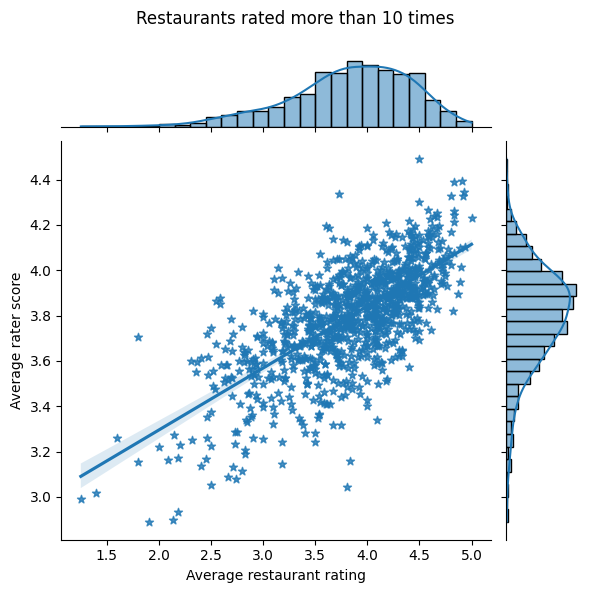

In [108]:
p=sns.jointplot(data=items_df, x="Average restaurant rating", y="Average rater score", kind="reg", marker="*") #.set(title='Restaurants rated more than 10 times')
p.fig.suptitle("Restaurants rated more than 10 times")
#p.ax_joint.collections[0].set_alpha(0)
#p.fig.tight_layout()
p.fig.subplots_adjust(top=0.90) # Reduce plot to make room 

In [109]:
result.rsquared

0.34147081465730955

# restaurants with more than x ratings


Text(0.5, 0, 'Yelp score')

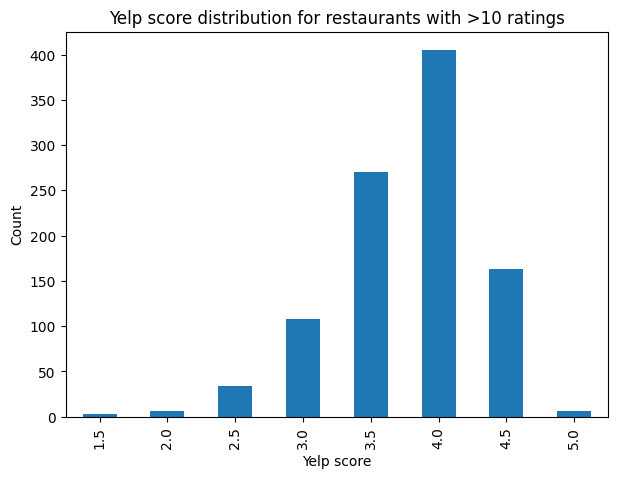

In [110]:
items_df.groupby('Yelp score').count()['count'].plot.bar()
plt.title('Yelp score distribution for restaurants with >10 ratings')
plt.ylabel('Count')
plt.xlabel('Yelp score')

Text(0.5, 0, 'Yelp score normal')

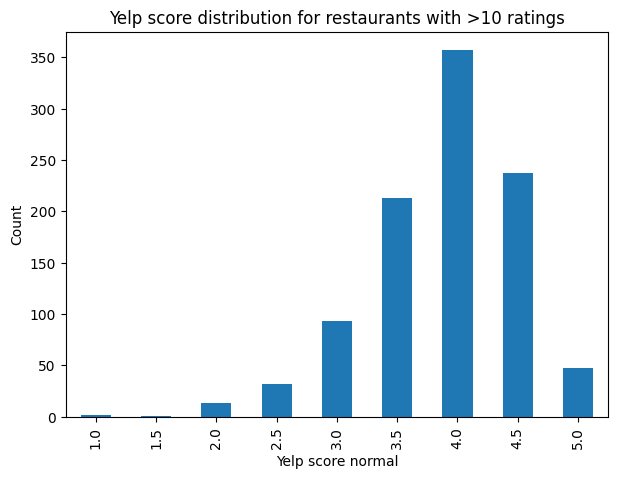

In [111]:
items_df.groupby('Yelp score normal').count()['count'].plot.bar()
plt.title('Yelp score distribution for restaurants with >10 ratings')
plt.ylabel('Count')
plt.xlabel('Yelp score normal')

# reviewer: are the deflating/inflating raters included in the target rating?
 if so, the higher variance deflators might have a bigger part in influencing these scores

In [112]:
top=items_df[items_df['Yelp score']>=4.5]
mid=items_df[items_df['Yelp score']==4]
low=items_df[items_df['Yelp score']<=3.5]

In [113]:
len(top)

169

In [114]:
len(top)/len(items_df)

0.16984924623115577

In [115]:
len(mid)

405

In [116]:
len(mid)/len(items_df)

0.40703517587939697

In [117]:
len(low)

421

In [118]:
len(low)/len(items_df)

0.42311557788944726

In [119]:
len(low)/(len(low)+len(mid)+len(top))

0.42311557788944726

In [120]:
len(mid)/(len(low)+len(mid)+len(top))

0.40703517587939697

In [121]:
len(top)/(len(low)+len(mid)+len(top))

0.16984924623115577

In [122]:
def sample_ratings_for_restaurant(df,item_ratings,rater_condition,num_samples,color,replace):
    # select a type of rater, say inflating or deflating
    df=df[rater_condition]
    print(len(df))
    # only select from qualified restaurants with more ratings than, say 200
    subset=df[df['item'].isin(item_ratings.index)]
    #print(len(subset))
    # sample, with replacement, the ratings from a subset of the selected rater type
    #sample=subset.groupby('item', group_keys=False).apply(lambda x: x.sample(num_samples,replace=True))
    sample=subset.groupby('item', group_keys=False).apply(lambda x: x.sample(num_samples,replace=replace))
    # aggregate by item
    ratings=sample[['item','rating']].groupby('item').mean()['rating']
    #print(len(ratings))
    # select indices of the top, bottom and middle items, according to yelp rating average
    top=item_ratings[item_ratings>=4.5]
    mid=item_ratings[item_ratings==4]
    low=item_ratings[item_ratings<=3.5]
    upper_quantile=1-len(top)/len(item_ratings)
    #print(upper_quantile)
    lower_quantile=len(low)/len(item_ratings)
    #print(lower_quantile)
    # set thresholds for the top and bottom restaurants
    H_thresh=sample[['item','rating']].groupby('item').mean()['rating'].quantile(upper_quantile)
    #print(H_thresh)
    L_thresh=sample[['item','rating']].groupby('item').mean()['rating'].quantile(lower_quantile)
    #print(L_thresh)
    # select indices of the top, bottom and middle items
    top_index=ratings[ratings>H_thresh].index
    mid_index=ratings[(ratings<=H_thresh) & (ratings>=L_thresh)].index
    low_index=ratings[ratings<L_thresh].index
    
    #compute accuracies
    accuracies=[]
    accuracies.append(len(low_index.intersection(low.index))/len(low.index))
    accuracies.append(len(mid_index.intersection(mid.index))/len(mid.index))
    accuracies.append(len(top_index.intersection(top.index))/len(top.index))
    plt.plot(accuracies,color=color)
    return accuracies

In [123]:
items_df.index

Index(['-3AooxIkg38UyUdlz5oXdw', '-ATiAtTikuGuqvaW2O6tNA',
       '-Fka99c-tJ-epWYNIobqyQ', '-If0ps0QhOLCYVWQWs9RYg',
       '-JStjL-8mRZq4ov4uI1FaQ', '-K0zTgGyxo-AeSkcV0IVaA',
       '-OIUunijjcq_ZzyyQhPPFQ', '-Or44IdY51Ukd618kikmtA',
       '-V0vIgo6196MDn_x3ZaYmA', '-WgD54ji0_MgHWgf9WBXrQ',
       ...
       'zMMSWTHxkLWYR359o-IuAg', 'zQPHrply2yeB1EGNnoS66A',
       'zSqTndm5Alq9dW1PyzbdTA', 'zVoxVPHEt11_0GzqNuT2ZQ',
       'zYu2D8FzczailDkEMURExg', 'zbvu8pRKcOQqdjqRGbncyQ',
       'zmpRwOqxaajeh2YvAKxLaQ', 'zrd6bulYNAKhCdSVtJ8aXQ',
       'zu4p6IZLSVn2Noto-vcwzw', 'zxuVnNVAUm16Sro0dS_lmg'],
      dtype='object', name='item', length=995)

In [124]:
items_df.head()

,Average restaurant rating,Average rater score,Yelp score,count,Yelp score normal,deflator count,inflator count
item,,,,,,,
-3AooxIkg38UyUdlz5oXdw,3.450000,3.759500,3.0,20,3.5,6,5
-ATiAtTikuGuqvaW2O6tNA,3.232143,3.717321,3.5,56,3.5,10,6
-Fka99c-tJ-epWYNIobqyQ,3.566667,3.757000,3.5,30,3.5,5,5
-If0ps0QhOLCYVWQWs9RYg,3.705882,4.047647,3.5,17,3.5,2,6
-JStjL-8mRZq4ov4uI1FaQ,4.600000,4.227000,4.0,10,5.0,1,5


In [125]:
items_df.sort_values('inflator count')

,Average restaurant rating,Average rater score,Yelp score,count,Yelp score normal,deflator count,inflator count
item,,,,,,,
3Yogz58lIto-kceF2y-THg,3.800000,3.045000,4.0,10,4.5,7,0
FKrP06TDAKtxNG1vrRQcQQ,2.200000,3.230000,2.5,10,2.5,4,0
di5ihAL9VWoctHelY8kLTQ,3.666667,3.731667,4.0,12,3.5,1,0
zCGoQt3VCVP0iT6WtIeHZA,4.100000,3.500000,3.5,10,4.0,5,0
voAosWO5yGhvppHRKm-7mQ,2.636364,3.650909,3.5,11,3.0,3,0
...,...,...,...,...,...,...,...
W4ZEKkva9HpAdZG88juwyQ,4.251121,3.891345,4.0,223,4.0,35,45
8uF-bhJFgT4Tn6DTb27viA,4.413043,3.997228,4.5,184,4.5,23,46
UCMSWPqzXjd7QHq7v8PJjQ,4.390244,3.989146,4.5,164,4.5,30,50


In [126]:
rater_condition=(df['pikiness']<deflaters) & (df['count']>min_num_ratings) 
df_tmp=df[rater_condition]
print(len(df_tmp))
# only select from qualified restaurants with more ratings than, say 200
subset=df_tmp[df_tmp['item'].isin(items_df.index)]

6220


In [127]:
subset.head()

,user,item,rating,review,date,category,name_x,year,count,pikiness,log_count,name_y,item_rating_count,item_rating_avg,city,score_by_normal_raters,norm_pickiness,norm_item_rating_avg,inflator,deflator
9,U7FKiS1eROsSzBg-7Ohr4Q,d_tRshM-w6S4QxE4VVi8tQ,2.0,B,2015-01-05 20:32:47,"American (New), Restaurants, Southern, Diners,...",Jones,2015,73,2.64,1.9,Jones,1141,3.5,Philadelphia,4.0,-1.649262,-0.466645,0,1
12,VFRIv3-_Og34wZyy-LigQQ,d_tRshM-w6S4QxE4VVi8tQ,5.0,J,2012-05-01 20:44:39,"American (New), Restaurants, Southern, Diners,...",Jones,2012,479,3.37,2.7,Jones,1141,3.5,Philadelphia,4.0,-0.609684,-0.466645,0,1
13,GKbnGAzj09-oUK7ZTbox2Q,d_tRshM-w6S4QxE4VVi8tQ,4.0,I,2009-10-16 21:25:42,"American (New), Restaurants, Southern, Diners,...",Jones,2009,24,3.04,1.4,Jones,1141,3.5,Philadelphia,4.0,-1.079630,-0.466645,0,1
17,DrXQ4xmASv5rHwZcdTP0iQ,d_tRshM-w6S4QxE4VVi8tQ,3.0,N,2011-08-02 18:26:45,"American (New), Restaurants, Southern, Diners,...",Jones,2011,33,3.23,1.5,Jones,1141,3.5,Philadelphia,4.0,-0.809055,-0.466645,0,1
22,11xwVSDv1ytjcyvUiyBWaw,d_tRshM-w6S4QxE4VVi8tQ,4.0,S,2011-05-29 16:02:40,"American (New), Restaurants, Southern, Diners,...",Jones,2011,71,3.08,1.9,Jones,1141,3.5,Philadelphia,4.0,-1.022667,-0.466645,0,1


In [128]:
sample=subset.groupby('item', group_keys=False).apply(lambda x: x.sample(5,replace=True))

In [129]:
sample.head()

,user,item,rating,review,date,category,name_x,year,count,pikiness,log_count,name_y,item_rating_count,item_rating_avg,city,score_by_normal_raters,norm_pickiness,norm_item_rating_avg,inflator,deflator
32026,4K8jTRdSscnWfsO5qKmU-Q,-3AooxIkg38UyUdlz5oXdw,1.0,H,2016-05-08 03:29:32,"Event Planning & Services, Restaurants, Nightl...",Chase Restaurant,2016,113,2.09,2.1,Chase Restaurant,436,3.0,Santa Barbara,3.5,-2.432506,-1.32834,0,1
32031,JFE-vsCj9PJwqr7C6rhk6g,-3AooxIkg38UyUdlz5oXdw,4.0,I,2012-08-18 15:31:31,"Event Planning & Services, Restaurants, Nightl...",Chase Restaurant,2012,138,3.17,2.1,Chase Restaurant,436,3.0,Santa Barbara,3.5,-0.894500,-1.32834,0,1
32037,bP4Iyslu2ZmAEVAvhfSblg,-3AooxIkg38UyUdlz5oXdw,4.0,M,2016-08-07 05:09:16,"Event Planning & Services, Restaurants, Nightl...",Chase Restaurant,2016,58,3.06,1.8,Chase Restaurant,436,3.0,Santa Barbara,3.5,-1.051149,-1.32834,0,1
32029,lOdaQWKOt9xZjD5vm2qNLg,-3AooxIkg38UyUdlz5oXdw,1.0,I,2012-01-05 17:51:19,"Event Planning & Services, Restaurants, Nightl...",Chase Restaurant,2012,12,3.00,1.1,Chase Restaurant,436,3.0,Santa Barbara,3.5,-1.136594,-1.32834,0,1
32029,lOdaQWKOt9xZjD5vm2qNLg,-3AooxIkg38UyUdlz5oXdw,1.0,I,2012-01-05 17:51:19,"Event Planning & Services, Restaurants, Nightl...",Chase Restaurant,2012,12,3.00,1.1,Chase Restaurant,436,3.0,Santa Barbara,3.5,-1.136594,-1.32834,0,1


In [130]:
(items_df).head()

,Average restaurant rating,Average rater score,Yelp score,count,Yelp score normal,deflator count,inflator count
item,,,,,,,
-3AooxIkg38UyUdlz5oXdw,3.450000,3.759500,3.0,20,3.5,6,5
-ATiAtTikuGuqvaW2O6tNA,3.232143,3.717321,3.5,56,3.5,10,6
-Fka99c-tJ-epWYNIobqyQ,3.566667,3.757000,3.5,30,3.5,5,5
-If0ps0QhOLCYVWQWs9RYg,3.705882,4.047647,3.5,17,3.5,2,6
-JStjL-8mRZq4ov4uI1FaQ,4.600000,4.227000,4.0,10,5.0,1,5


In [131]:
#items_df=(items_df[(items_df['Yelp score']>3) &(items_df['Yelp score']<5) & (items_df['deflator count']>50) &(items_df_200['inflator count']>50)])

In [132]:
len(items_df_200)

3

In [133]:
len(items_df[items_df['Yelp score']==4.5])

163

In [134]:
len(items_df[items_df['Yelp score']==4])

405

In [135]:
len(items_df[items_df['Yelp score']==3.5])

270

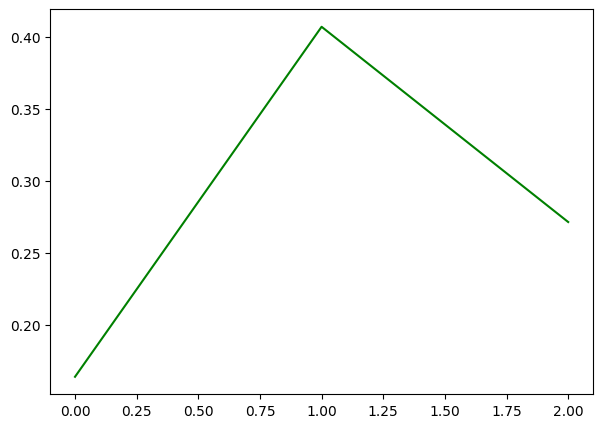

In [136]:
baseline=[]
baseline.append(len(items_df[items_df['Yelp score']==4.5])/len(items_df['Yelp score']))

baseline.append(len(items_df[items_df['Yelp score']==4])/len(items_df['Yelp score']))
baseline.append(len(items_df[items_df['Yelp score']==3.5])/len(items_df['Yelp score']))
plt.plot(baseline,'g')

In [137]:
baseline

[0.16381909547738693, 0.40703517587939697, 0.271356783919598]

# Main Result

Picky raters are more accurate at predicting restaurants with more than 200 ratings in the 4.5 stars group.



3.43
4.31
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625


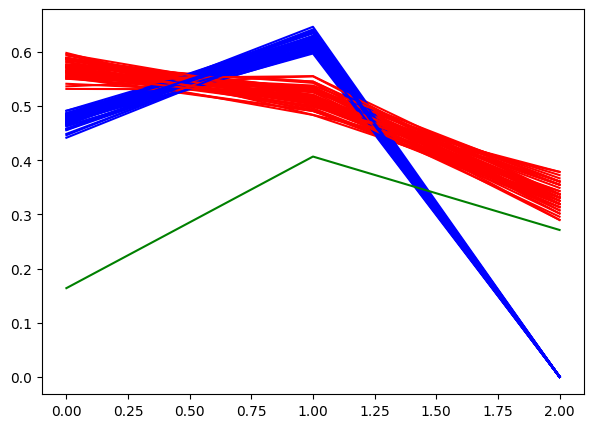

In [138]:
picky_accuracy_lo=[]
picky_accuracy_mid=[]
picky_accuracy_hi=[]
infl_accuracy_lo=[]
infl_accuracy_mid=[]
infl_accuracy_hi=[]

min_num_ratings=4
#min_num_ratings=9
#  we should select users with more than 10 ratings for our thresholds
deflaters=df_yelp_users[df_yelp_users['count']>min_num_ratings]['pikiness'].quantile(.25)
inflaters=df_yelp_users[df_yelp_users['count']>min_num_ratings]['pikiness'].quantile(.75)
# referee: should restaurant_scores only be computed out of sample?
# select ratings by "normal" users
restaurant_scores=items_df['Yelp score']
print(deflaters)
print(inflaters)
number_of_samples=10
for i in range(0,50):
    condition=(df['pikiness']<deflaters) & (df['count']>min_num_ratings) 
    a=sample_ratings_for_restaurant(df,restaurant_scores, condition,number_of_samples,'r',True)
    picky_accuracy_lo.append(a[0])
    picky_accuracy_mid.append(a[1])
    picky_accuracy_hi.append(a[2])
    condition=(df['pikiness']>inflaters) & (df['count']>min_num_ratings) 
    b=sample_ratings_for_restaurant(df,restaurant_scores, condition,number_of_samples,'b',True)
    infl_accuracy_lo.append(b[0])
    infl_accuracy_mid.append(b[1])
    infl_accuracy_hi.append(b[2])

plt.plot(baseline,'g')

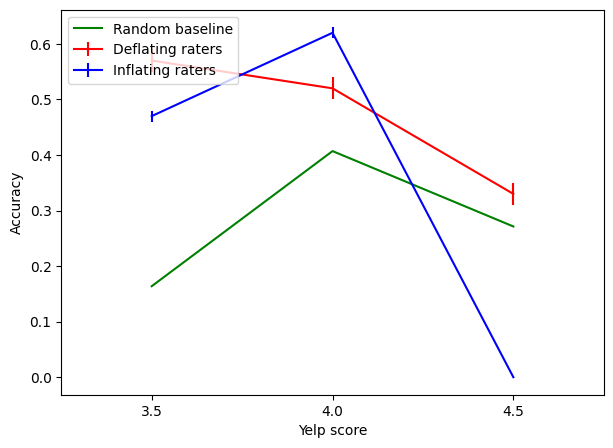

In [139]:
defl=(np.mean(picky_accuracy_lo).round(2), np.mean(picky_accuracy_mid).round(2), np.mean(picky_accuracy_hi).round(2))
infl=(np.mean(infl_accuracy_lo).round(2), np.mean(infl_accuracy_mid).round(2), np.mean(infl_accuracy_hi).round(2))
defl_eb=(np.std(picky_accuracy_lo).round(2), np.std(picky_accuracy_mid).round(2), np.std(picky_accuracy_hi).round(2))
infl_eb=(np.std(infl_accuracy_lo).round(2), np.std(infl_accuracy_mid).round(2), np.std(infl_accuracy_hi).round(2))
fig,ax=plt.subplots()
ax.errorbar([3.5,4,4.5],defl,yerr=defl_eb,color='r',label='Deflating raters')
ax.errorbar([3.5,4,4.5],infl,yerr=infl_eb,color='b',label='Inflating raters')
plt.plot([3.5,4,4.5],baseline,'g',label='Random baseline')
plt.xlim([3.25,4.75])
ax.set_xticks([3.5,4,4.5])
plt.xlabel('Yelp score')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# referee: do the same with Yelp Score norm
to avoid the effect whereby higher variance ratings might have an outsized impact

3.43
4.31
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625
6443
5625


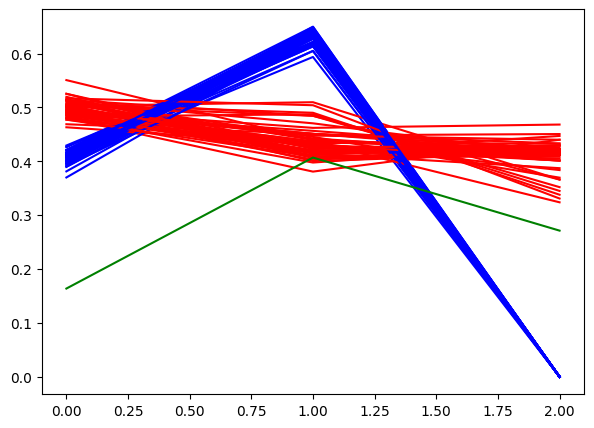

In [140]:
picky_accuracy_lo=[]
picky_accuracy_mid=[]
picky_accuracy_hi=[]
infl_accuracy_lo=[]
infl_accuracy_mid=[]
infl_accuracy_hi=[]

min_num_ratings=4
#min_num_ratings=9
#  we should select users with more than 10 ratings for our thresholds
deflaters=df_yelp_users[df_yelp_users['count']>min_num_ratings]['pikiness'].quantile(.25)
inflaters=df_yelp_users[df_yelp_users['count']>min_num_ratings]['pikiness'].quantile(.75)
# referee: should restaurant_scores only be computed out of sample?
# select ratings by "normal" users
restaurant_scores=items_df['Yelp score normal']
print(deflaters)
print(inflaters)
for i in range(0,50):
    condition=(df['pikiness']<deflaters) & (df['count']>min_num_ratings) 
    a=sample_ratings_for_restaurant(df,restaurant_scores, condition,10,'r',True)
    picky_accuracy_lo.append(a[0])
    picky_accuracy_mid.append(a[1])
    picky_accuracy_hi.append(a[2])
    condition=(df['pikiness']>inflaters) & (df['count']>min_num_ratings) 
    b=sample_ratings_for_restaurant(df,restaurant_scores, condition,10,'b',True)
    infl_accuracy_lo.append(b[0])
    infl_accuracy_mid.append(b[1])
    infl_accuracy_hi.append(b[2])

plt.plot(baseline,'g')

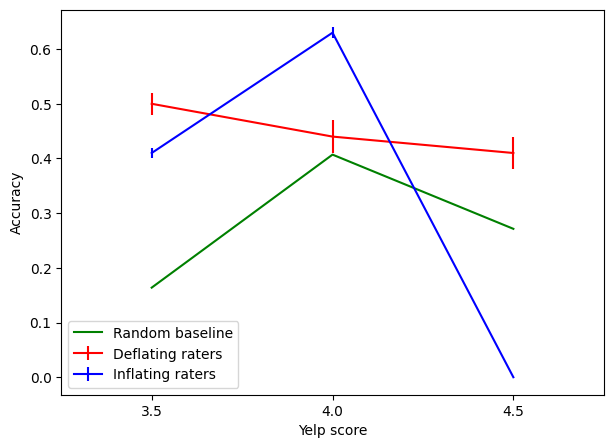

In [141]:
defl=(np.mean(picky_accuracy_lo).round(2), np.mean(picky_accuracy_mid).round(2), np.mean(picky_accuracy_hi).round(2))
infl=(np.mean(infl_accuracy_lo).round(2), np.mean(infl_accuracy_mid).round(2), np.mean(infl_accuracy_hi).round(2))
defl_eb=(np.std(picky_accuracy_lo).round(2), np.std(picky_accuracy_mid).round(2), np.std(picky_accuracy_hi).round(2))
infl_eb=(np.std(infl_accuracy_lo).round(2), np.std(infl_accuracy_mid).round(2), np.std(infl_accuracy_hi).round(2))
fig,ax=plt.subplots()
ax.errorbar([3.5,4,4.5],defl,yerr=defl_eb,color='r',label='Deflating raters')
ax.errorbar([3.5,4,4.5],infl,yerr=infl_eb,color='b',label='Inflating raters')
plt.plot([3.5,4,4.5],baseline,'g',label='Random baseline')
plt.xlim([3.25,4.75])
ax.set_xticks([3.5,4,4.5])
plt.xlabel('Yelp score')
plt.ylabel('Accuracy')
plt.legend(loc='lower left')

In [142]:
defl

(0.5, 0.44, 0.41)

In [143]:
infl

(0.41, 0.63, 0.0)